In [2]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import getweather

In [4]:
allyears = np.vstack([getweather.getyear('PASADENA', ['TMIN', 'TMAX'], year)
                     for year in range(1910, 2019)])

In [5]:
allyears

array([[( 2.2, 12.2), ( 1.1, 10. ), (-0.6, 11.7), ..., ( 1.7, 21.1),
        ( 0.6, 18.9), ( 1.1, 17.2)],
       [(-0.6, 18.3), ( 0.6, 20.6), ( 1.1, 21.1), ..., ( 0. , 13.9),
        (-1.7, 14.4), (-1.7, 13.9)],
       [( 3.3, 15. ), ( 2.2, 16.1), ( 0. , 17.2), ..., (-0.6, 18.3),
        ( 0.6, 21.1), ( 2.2, 20. )],
       ...,
       [( 4.4, 17.8), ( 4.4, 17.2), ( 6.7, 17.8), ..., ( 5.6, 18.3),
        ( 4.4, 15.6), ( 4.4, 14.4)],
       [( 3.3, 11.7), ( 3.3, 13.9), ( 6.7, 12.2), ..., ( 9.4, 29.4),
        ( 9.4, 30.6), ( 8.9, 25.6)],
       [( 8.3, 21.7), ( 8.9, 22.8), (11.7, 27.2), ..., ( 2.2, 16.1),
        ( 5. , 18.3), ( 7.8, 17.2)]],
      dtype=[('TMIN', '<f8'), ('TMAX', '<f8')])

In [10]:
len(allyears)

109

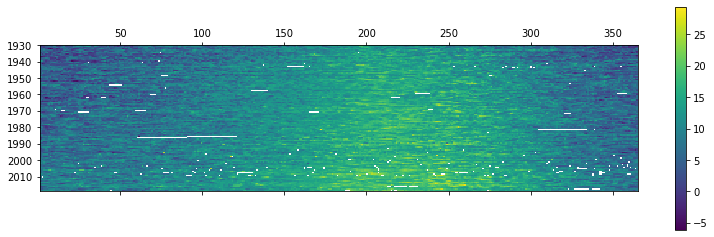

In [8]:
#extent is used to name the label ranges
plt.matshow(allyears['TMIN'], extent=[1,365,2019,1930])
plt.colorbar()

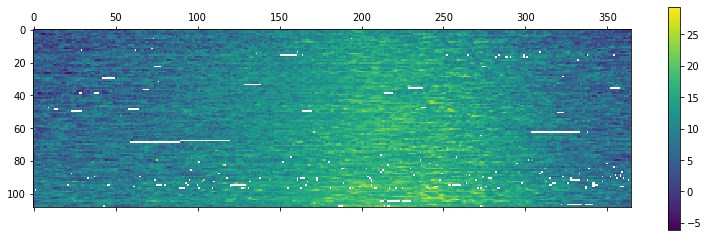

In [9]:
plt.matshow(allyears['TMIN'])
plt.colorbar()

In [11]:
tmin_record = np.nanmin(allyears['TMIN'], axis=0)
tmax_record = np.nanmax(allyears['TMAX'], axis=0)

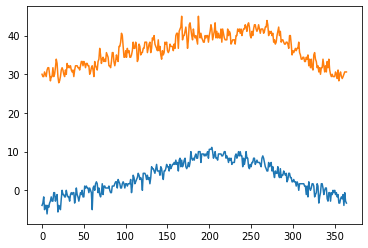

In [12]:
plt.plot(tmin_record)
plt.plot(tmax_record)

In [13]:
normal = np.vstack([getweather.getyear('PASADENA', ['TMIN', 'TMAX'], year)
                   for year in range(1981, 2011)])

In [14]:
tmin_normal = np.nanmean(allyears['TMIN'], axis=0)
tmax_normal = np.nanmean(allyears['TMAX'], axis=0)

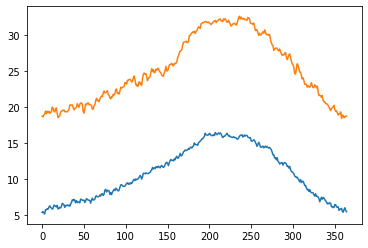

In [15]:
plt.plot(tmin_normal)
plt.plot(tmax_normal)

In [16]:
station, year = 'PASADENA', 2018

thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

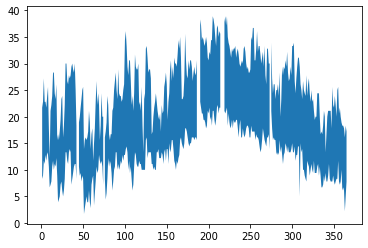

In [17]:
days = np.arange(1, 366)

plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'])

In [19]:
avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))

In [20]:
f'{station}, {year}: average temperature = {avg:.2f} C'

'PASADENA, 2018: average temperature = 19.46 C'

In [21]:
avg2 = (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX'])) / 2.0
f'{station}, {year}: average temperature = {avg2:.2f} C'

'PASADENA, 2018: average temperature = 19.46 C'

Text(0.5, 1.0, 'PASADENA, 2018: average temperature = 19.46 C')

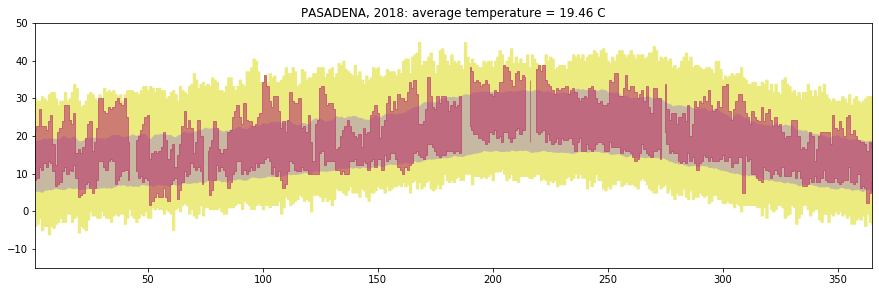

In [28]:
plt.figure(figsize=(15,4.5))

plt.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.50), step='mid')
plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.63))

#alpha deals with transparency
plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'],
                color=(0.73,0.21,0.41), alpha=0.6, step='mid')

plt.axis(xmin=1, xmax=365, ymin=-15, ymax=50)

plt.title(f'{station}, {year}: average temperature = {avg:.2f} C')

In [29]:
def nyplot(station, year):
    plt.figure(figsize=(15,4.5))
    
    allyears = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                   for year in range(1910, 2020)])
    
    normal = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                   for year in range(1981, 2011)])
    
    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)
    
    days = np.arange(1, 366)
    
    plt.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.50), step='mid')
    plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.63))

    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)
    
    plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'],
                color=(0.73,0.21,0.41), alpha=0.6, step='mid')
    
    plt.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
    avg2 = (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX'])) / 2.0
    f'{station}, {year}: average temperature = {avg2:.2f} C'

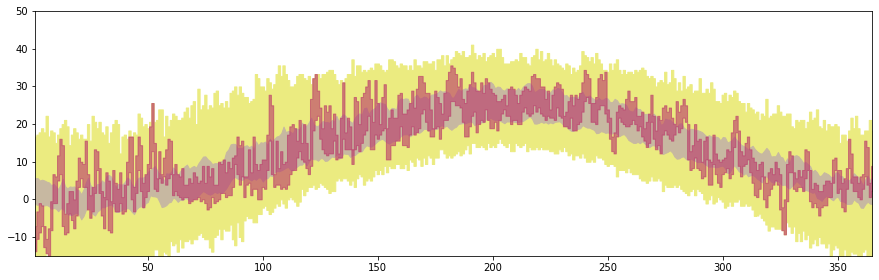

In [30]:
nyplot('New York', 2018)